# 미국 질병통제예방센터(CDC) 에서 성인 약 32만명을 대상으로 건강상태를 설문한 데이터


In [6]:
import csv
f = open('/content/drive/MyDrive/heart_2020_cleaned.csv','r',encoding = 'utf-8')
data = csv.reader(f)


In [9]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import warnings
df=pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv')
df.head(10)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [10]:
df = df.drop(df.columns[[0, 2, 3,4,7,8,10,11,12,13,15,16,17]], axis=1)

df['AgeCategory']=df['AgeCategory'].str[:2]
df = df.apply(pd.to_numeric)
df.head(10)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
0,16.60,3.0,30.0,55,5.0
1,20.34,0.0,0.0,80,7.0
2,26.58,20.0,30.0,65,8.0
3,24.21,0.0,0.0,75,6.0
4,23.71,28.0,0.0,40,8.0
5,28.87,6.0,0.0,75,12.0
6,21.63,15.0,0.0,70,4.0
7,31.64,5.0,0.0,80,9.0
8,26.45,0.0,0.0,80,5.0
9,40.69,0.0,0.0,65,10.0


# 수치 데이터의 상관계수를 히트맵을 통해 시각화

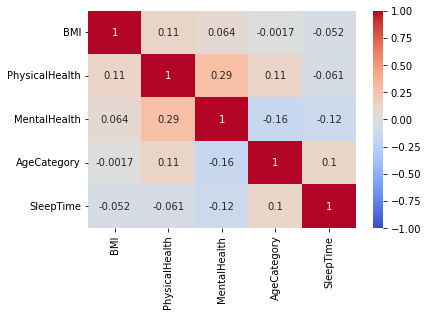

In [ ]:
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
#상관계수에 뚜렸한 내용이 없기 때문에 다른 컬럼을 사용해서 가설을 세운다.

# AgeCategory 나이대 분포도 시각화 

10대: 21064
20대: 16955
30대: 39303
40대: 42797
50대: 55139
60대: 67837
70대: 52547
80대: 24153


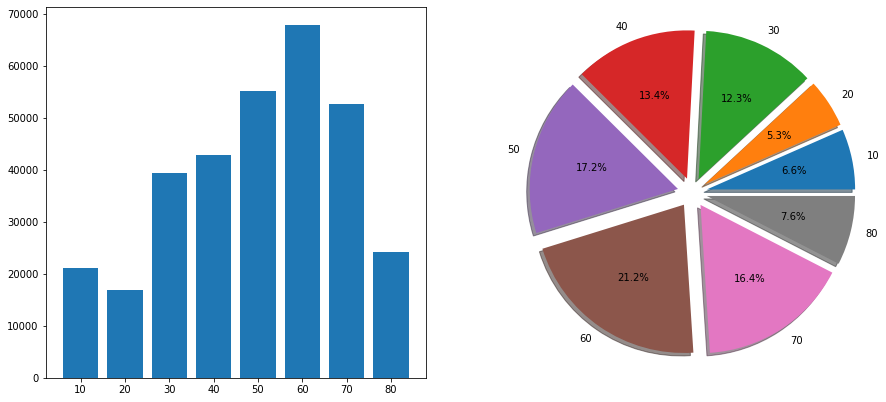

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

t_df = pd.read_csv("heart_2020_cleaned.csv")
#18세 부터 80세 이상의 참여자까지 
age10 = t_df[t_df['AgeCategory'].str[:1] == '1']
age20 = t_df[t_df['AgeCategory'].str[:1] == '2']
age30 = t_df[t_df['AgeCategory'].str[:1] == '3']
age40 = t_df[t_df['AgeCategory'].str[:1] == '4']
age50 = t_df[t_df['AgeCategory'].str[:1] == '5']
age60 = t_df[t_df['AgeCategory'].str[:1] == '6']
age70 = t_df[t_df['AgeCategory'].str[:1] == '7']
age80 = t_df[t_df['AgeCategory'].str[:1] == '8']
print("10대:",len(age10))
print("20대:",len(age20))
print("30대:",len(age30))
print("40대:",len(age40))
print("50대:",len(age50))
print("60대:",len(age60))
print("70대:",len(age70))
print("80대:",len(age80))
#설문조사 참여자 나이대 시각화
plt.figure(figsize=(15,15))
explode1 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1]

age = [len(age10),len(age20),len(age30),len(age40),len(age50),len(age60),len(age70),len(age80)]
label = ['10','20','30','40','50','60','70','80']
plt.subplot(2,2,1)
plt.bar(["10","20","30","40","50","60","70","80"], height = [len(age10),len(age20),len(age30),len(age40),len(age50),len(age60),len(age70),len(age80)])
plt.plot()
plt.subplot(2,2,2)
plt.pie(age,labels = label,autopct ='%.1f%%',explode=explode1,shadow=True)
plt.show()


심장질환有: 27373
심장질환無: 292422
당뇨有: 40802
당뇨無: 269653
뇌졸중有: 12069
뇌졸중無: 307726
흡연자: 12069
비흡연자: 307726


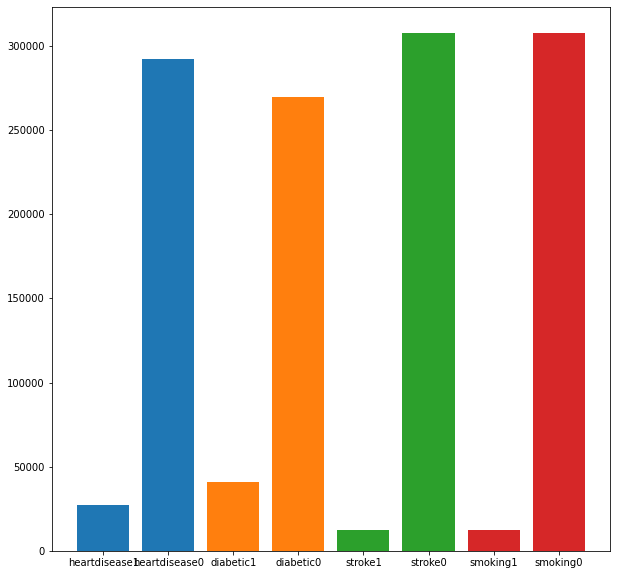

In [20]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

t_df = pd.read_csv("/content/drive/MyDrive/heart_2020_cleaned.csv")
#심장병 유무 
heart0 = t_df[t_df["HeartDisease"] =="No"]
heart1 = t_df[t_df["HeartDisease"] =="Yes"]

#당뇨병 유무
diabetic0 = t_df[t_df["Diabetic"] =="No"]
diabetic1 = t_df[t_df["Diabetic"] =="Yes"]

#뇌졸중 유무
stroke0 = t_df[t_df["Stroke"] =="No"]
stroke1 = t_df[t_df["Stroke"] =="Yes"]

#흡연여부
smoking0 = t_df[t_df["Stroke"] =="No"]
smoking1 = t_df[t_df["Stroke"] =="Yes"]


print("심장질환有:", len(heart1))
print("심장질환無:", len(heart0))

print("당뇨有:", len(diabetic1))
print("당뇨無:", len(diabetic0))

print("뇌졸중有:", len(stroke1))
print("뇌졸중無:", len(stroke0))

print("흡연자:", len(smoking1))
print("비흡연자:", len(smoking0))

plt.figure(figsize=(10,10))
plt.bar(["heartdisease1","heartdisease0"], height = [len(heart1),len(heart0)])
plt.bar(["diabetic1","diabetic0"], height = [len(diabetic1),len(diabetic0)])
plt.bar(["stroke1","stroke0"], height = [len(stroke1),len(stroke0)])
plt.bar(["smoking1","smoking0"], height = [len(smoking1),len(smoking0)])
plt.show()





BMI 30 이상: 102842
BMI 30 미만: 216953
전체: 319795


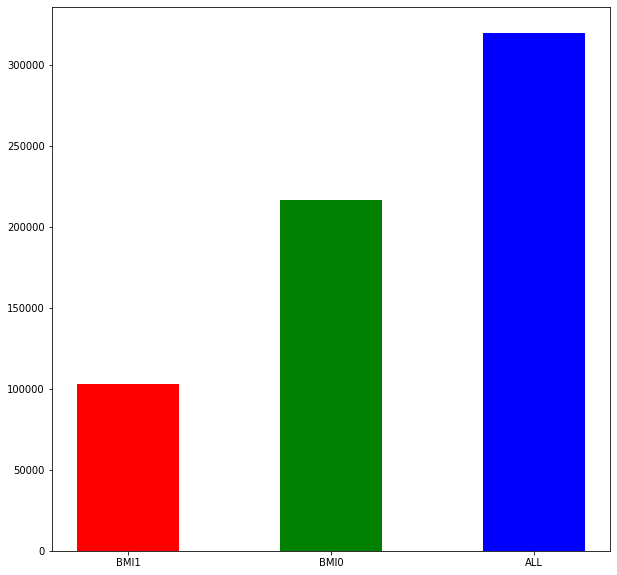

In [ ]:
#BMI 30 미만은 정상
BMI1 = t_df[t_df["BMI"] >= 30]
BMI0 = t_df[t_df["BMI"] < 30]
ALL = t_df[t_df["BMI"] > 0]

print("BMI 30 이상:", len(BMI1))
print("BMI 30 미만:", len(BMI0))
print("전체:", len(ALL))
plt.figure(figsize=(10,10))
label1=['BMI 30 over','BMI 30 under','all']
color1 = ["red","green","blue"]

plt.bar(["BMI1","BMI0","ALL"], height = [len(BMI1),len(BMI0), len(ALL)], color = color1, label=label1, width = 0.5)
plt.show()

#가설1 : 수면부족이 뇌졸중을 부른다.

6시간이상수면: 289530
6시간미만수면 : 30265


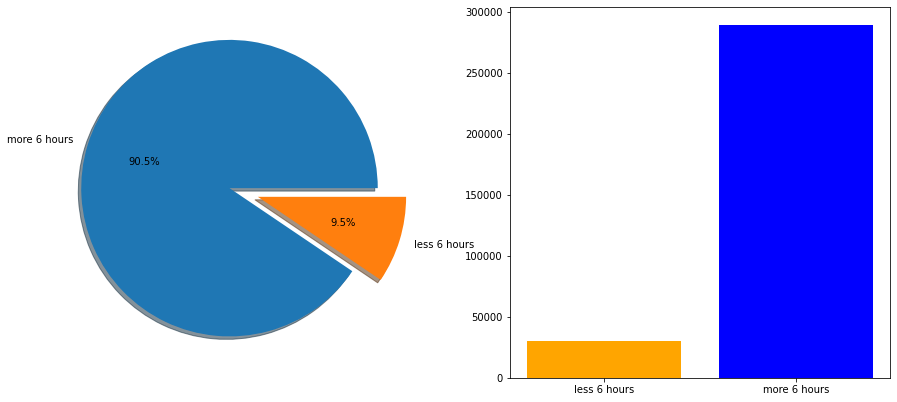

In [23]:
import csv
import pandas as pd
import matplotlib.pyplot as plt


t_df = pd.read_csv("/content/drive/MyDrive/heart_2020_cleaned.csv")

#수면시간
moresleep = t_df[t_df["SleepTime"] >= 6]
lesssleep = t_df[t_df["SleepTime"] < 6]
all = len(t_df["SleepTime"])

size = [len(moresleep),len(lesssleep)]

print("6시간이상수면:", len(moresleep))
print("6시간미만수면 :", len(lesssleep))

explode1 = [0.1, 0.1]

label= ['more 6 hours','less 6 hours']

color1 = ["orange", "blue"]


plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.pie(size,labels=label,autopct = '%.1f%%',explode=explode1,shadow=True)
plt.subplot(2,2,2)
plt.bar(["less 6 hours","more 6 hours"], height = [len(lesssleep),len(moresleep)], color = color1)
plt.show()

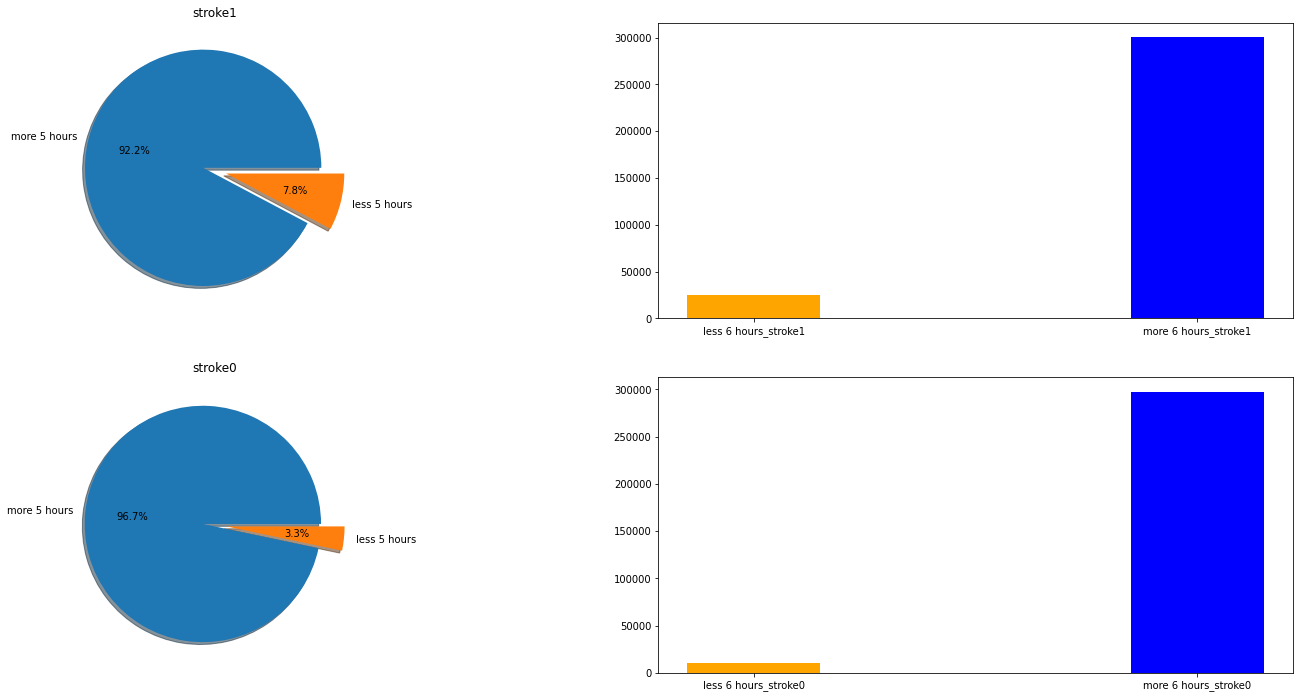

In [28]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

t_df = pd.read_csv("/content/drive/MyDrive/heart_2020_cleaned.csv")
#수면시간 6시간을 기준
moresleep = t_df[t_df["SleepTime"] >= 5]
lesssleep = t_df[t_df["SleepTime"] < 5]

#수면시간으로 대조
#뇌졸중을 앓고 있는 사람들의 수면습관
moresleep_stroke1 = moresleep[moresleep["Stroke"] == "Yes"]
lesssleep_stroke1 = lesssleep[lesssleep["Stroke"] == "Yes"]
#뇌졸중이 없는 사람들의 수면습관
moresleep_stroke0 = moresleep[moresleep["Stroke"] == "No"]
lesssleep_stroke0 = lesssleep[lesssleep["Stroke"] == "No"]

explode1 = [0.1, 0.1]

colors = ["orange", "blue"]
size1 = [len(moresleep_stroke1),len(lesssleep_stroke1)]
size0 = [len(moresleep_stroke0),len(lesssleep_stroke0)]
label = ["more 5 hours","less 5 hours"]


plt.figure(figsize=(25,25))
plt.subplot(4,2,1)
plt.title("stroke1")
plt.pie(size1,labels=label,autopct = '%.1f%%',explode=explode1,shadow=True)
plt.subplot(4,2,2)
plt.bar(["less 6 hours_stroke1","more 6 hours_stroke1"], height = [len(lesssleep_stroke1)*27,len(moresleep_stroke1)*27], color = colors, width = 0.3)
plt.subplot(4,2,3)
plt.title("stroke0")
plt.pie(size0,labels=label,autopct = '%.1f%%',explode=explode1,shadow=True)
plt.subplot(4,2,4)
plt.bar(["less 6 hours_stroke0","more 6 hours_stroke0"], height = [len(lesssleep_stroke0),len(moresleep_stroke0)], color = colors,width = 0.3)
plt.show()

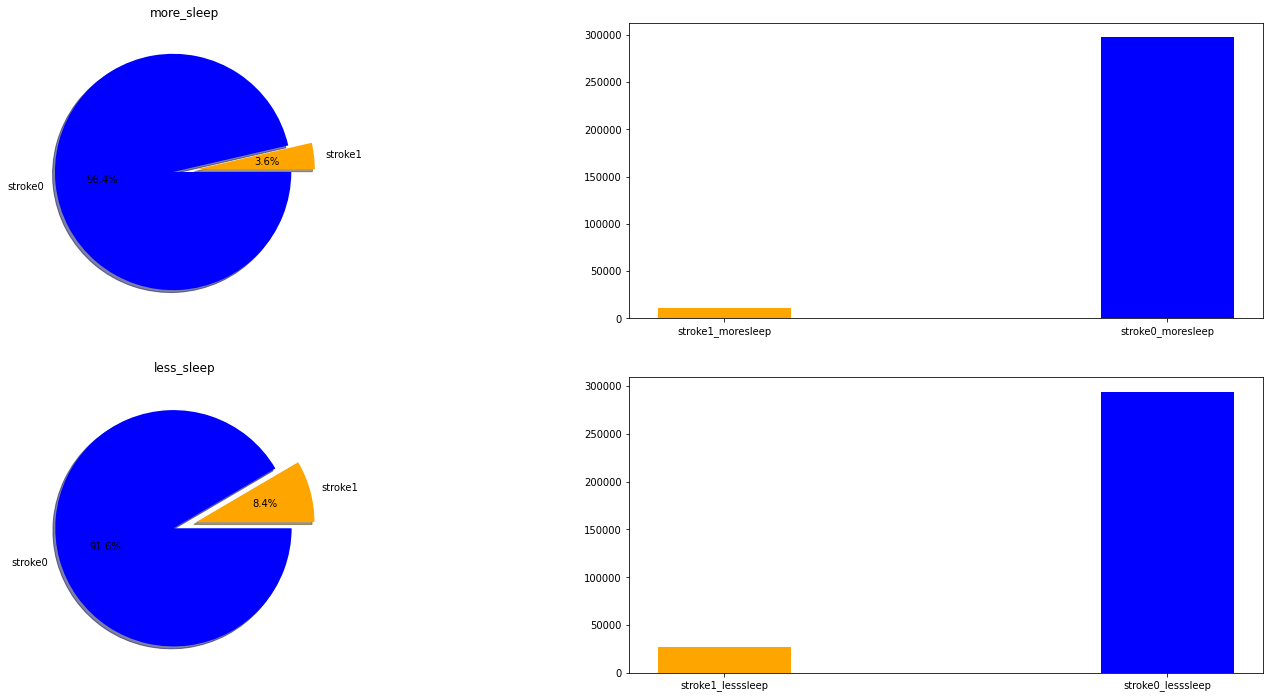

In [30]:
#뇌졸중 여부로 대조
#뇌졸중 유무
stroke0 = t_df[t_df["Stroke"] =="No"]
stroke1 = t_df[t_df["Stroke"] =="Yes"]

stroke1_moresleep = stroke1[(stroke1["SleepTime"] >= 5)]
stroke0_moresleep = stroke0[stroke0["SleepTime"] >= 5 ]

stroke1_lesssleep = stroke1[(stroke1["SleepTime"] < 5)]
stroke0_lesssleep = stroke0[(stroke0["SleepTime"] < 5)]

size1 = [len(stroke1_moresleep),len(stroke0_moresleep)]
size0 = [len(stroke1_lesssleep ),len(stroke0_lesssleep)]

label1= ['stroke1','stroke0']
colors = ["orange", "blue"]
color = ["orange", "blue"]
explode1 = [0.1, 0.1]

plt.figure(figsize=(25,25))


plt.subplot(4,2,1)
plt.title("more_sleep")
plt.pie(size1,labels=label1,autopct = '%.1f%%',explode=explode1,shadow=True, colors = color)

plt.subplot(4,2,2)
plt.bar(["stroke1_moresleep","stroke0_moresleep"], height =[len(stroke1_moresleep),len(stroke0_moresleep)],color = colors ,width = 0.3)
plt.subplot(4,2,3)
plt.title("less_sleep")
plt.pie(size0,labels=label1,autopct = '%.1f%%',explode=explode1,shadow=True, colors = color)
plt.subplot(4,2,4)
plt.bar(["stroke1_lesssleep","stroke0_lesssleep"], height = [len(stroke1_lesssleep)*29,len(stroke0_lesssleep)*29],color = colors, width = 0.3)
plt.show()



#가설2 : 흡연은 심장에 나쁘다.


심장질환 有: 27373
심장질환 無: 292422


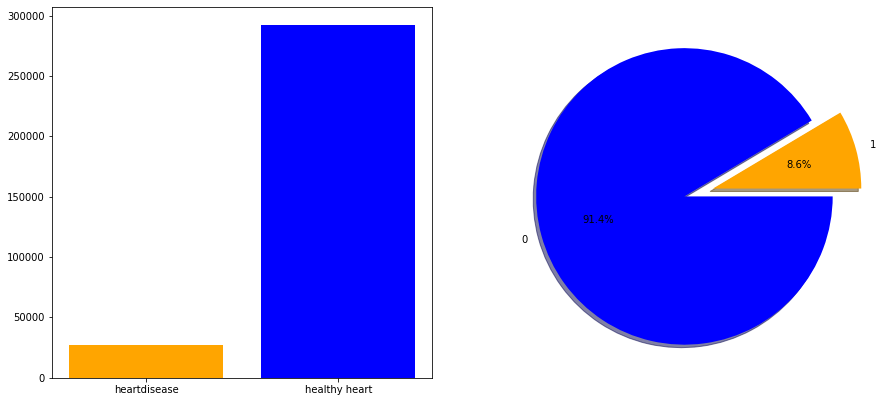

In [16]:
#전체 데이터에서 심장병을 가진 사람들의 비율 가시화
import csv
import pandas as pd
import matplotlib.pyplot as plt

t_df = pd.read_csv("/content/drive/MyDrive/heart_2020_cleaned.csv")

heart0 = t_df[t_df["HeartDisease"] =="No"]
heart1 = t_df[t_df["HeartDisease"] =="Yes"]

print("심장질환 有:", len(heart1))
print("심장질환 無:", len(heart0))

explode1 = [0.1, 0.1]
heartdisease = [len(heart1), len(heart0)]
label = ["1","0"]
color = ['orange','blue']
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.bar(["heartdisease","healthy heart"], height = [len(heart1),len(heart0)], color = colors)
plt.subplot(2,2,2)
plt.pie(heartdisease ,labels=label,autopct = '%.1f%%',explode=explode1,shadow=True ,colors = color)
plt.show()




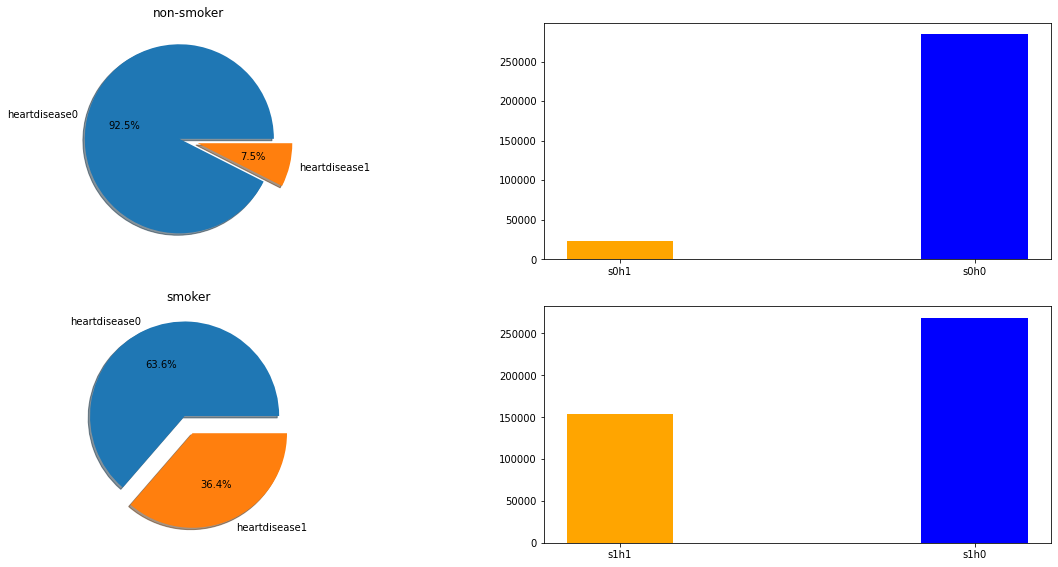

In [26]:
#흡연을 하면 심장병 확률 올라갈까?


#흡연여부
smoking0 = t_df[t_df["Stroke"] =="No"]
smoking1 = t_df[t_df["Stroke"] =="Yes"]
#비흡연자 심장질환
s0h1 = smoking0[(smoking0["HeartDisease"] == 'Yes')]
s0h0 = smoking0[(smoking0["HeartDisease"] == 'No')]
#흡연자 심장질환
s1h1 = smoking1[(smoking1["HeartDisease"] =='Yes')]
s1h0 = smoking1[(smoking1["HeartDisease"] =='No')]

size1 = [len(s0h0),len(s0h1)]
size0 = [len(s1h0),len(s1h1)]

label1= ['heartdisease0','heartdisease1']
colors = ["orange", "blue"]
explode1 = [0.1, 0.1]

plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plt.title("non-smoker")
plt.pie(size1,labels=label1,autopct = '%.1f%%',explode=explode1,shadow=True)

plt.subplot(4,2,2)
plt.bar(["s0h1","s0h0"], height =[len(s0h1),len(s0h0)],color = colors ,width = 0.3)
plt.subplot(4,2,3)
plt.title("smoker")
plt.pie(size0,labels=label1,autopct = '%.1f%%',explode=explode1,shadow=True)
plt.subplot(4,2,4)
plt.bar(["s1h1","s1h0"], height = [len(s1h1)*35,len(s1h0)*35],color = colors, width = 0.3)
plt.show()
